### 研究室の課題

### make_moonsを使ってデータを作っていく

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import make_moons
%matplotlib inline

# np.random.seed(1)
# torch.manual_seed(1)
# x = np.random.uniform(low=-1, high=1, size=(200, 2))    # 200個のデータを作成  (200, 2)の行列  2次元
# y = np.ones(len(x))     # 200個のデータに対して、1を割り当てる
# print('len(x):', len(x))
# print(y)
# y[x[:, 0] * x[:, 1]<0] = 0      # x1 * x2 < 0の場合、0を割り当てる

# データの作成
x, y = make_moons(n_samples=200, noise=0.1, random_state=1)
print('x.shape:', x.shape)
print('y.shape:', y.shape)
print('x:', x)
print('y:', y)

x.shape: (200, 2)
y.shape: (200,)
x: [[-0.29029155  0.92975933]
 [ 0.3456798   1.12880954]
 [ 0.47916806  0.9287775 ]
 [-0.06302218  0.35866538]
 [ 1.81106918  0.10402976]
 [ 2.04225275  0.47567303]
 [-1.03727167  0.18700782]
 [ 1.23047539  0.11420412]
 [ 0.57319032  0.82683726]
 [ 1.8000829  -0.36418222]
 [ 1.44904639 -0.20772151]
 [ 0.84445679  0.56026784]
 [ 1.03043774  0.12853666]
 [-0.8683864   0.43045058]
 [ 0.02948083  0.17688211]
 [ 0.30019474 -0.18230532]
 [ 1.36427172 -0.53213168]
 [ 0.43467891  0.87901637]
 [ 0.53047052 -0.35583723]
 [-0.25779211  1.17609373]
 [-0.06380638  1.02798515]
 [ 0.88465564  0.46624344]
 [ 0.19693141  1.00034708]
 [-0.92806637  0.02294562]
 [ 0.63697653  0.84389166]
 [ 1.26207055 -0.26240599]
 [ 0.60432816  0.90091538]
 [ 0.70826732  0.78518158]
 [ 1.96326895  0.38507461]
 [ 0.61294293  0.75624562]
 [-0.00410577  0.95891889]
 [ 1.41790883 -0.2730916 ]
 [ 1.9996195   0.40736263]
 [ 1.75712895 -0.05270045]
 [ 1.88551312 -0.14500075]
 [-1.00634662 -0.1

tensor([[-0.2903,  0.9298],
        [ 0.3457,  1.1288],
        [ 0.4792,  0.9288],
        [-0.0630,  0.3587],
        [ 1.8111,  0.1040],
        [ 2.0423,  0.4757],
        [-1.0373,  0.1870],
        [ 1.2305,  0.1142],
        [ 0.5732,  0.8268],
        [ 1.8001, -0.3642],
        [ 1.4490, -0.2077],
        [ 0.8445,  0.5603],
        [ 1.0304,  0.1285],
        [-0.8684,  0.4305],
        [ 0.0295,  0.1769],
        [ 0.3002, -0.1823],
        [ 1.3643, -0.5321],
        [ 0.4347,  0.8790],
        [ 0.5305, -0.3558],
        [-0.2578,  1.1761],
        [-0.0638,  1.0280],
        [ 0.8847,  0.4662],
        [ 0.1969,  1.0003],
        [-0.9281,  0.0229],
        [ 0.6370,  0.8439],
        [ 1.2621, -0.2624],
        [ 0.6043,  0.9009],
        [ 0.7083,  0.7852],
        [ 1.9633,  0.3851],
        [ 0.6129,  0.7562],
        [-0.0041,  0.9589],
        [ 1.4179, -0.2731],
        [ 1.9996,  0.4074],
        [ 1.7571, -0.0527],
        [ 1.8855, -0.1450],
        [-1.0063, -0

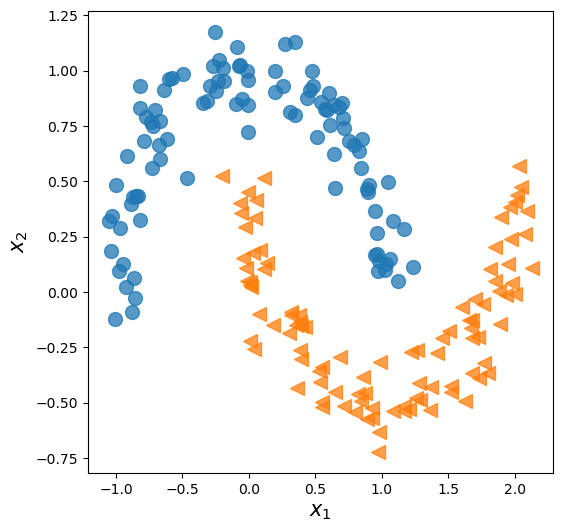

In [11]:
n_train = 100
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

print(x_train)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0],        # y==0の行の、xの0列目を取得
         x[y==0, 1], 'o', alpha=0.75, markersize=10)        # y==0の場合、xの1列目を取得
plt.plot(x[y==1, 0],
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)

#plt.savefig('figures/13_02.png', dpi=300)
plt.show()

In [12]:
from torch.utils.data import DataLoader, TensorDataset

train_ds = TensorDataset(x_train, y_train)
batch_size = 2
torch.manual_seed(1)
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


In [14]:
import torch.nn as nn

model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [15]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [17]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()

        loss_hist_train[epoch] /= n_train/batch_size
        accuracy_hist_train[epoch] /= n_train/batch_size

        pred = model(x_valid)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred>=0.5).float() == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, x_valid, y_valid)

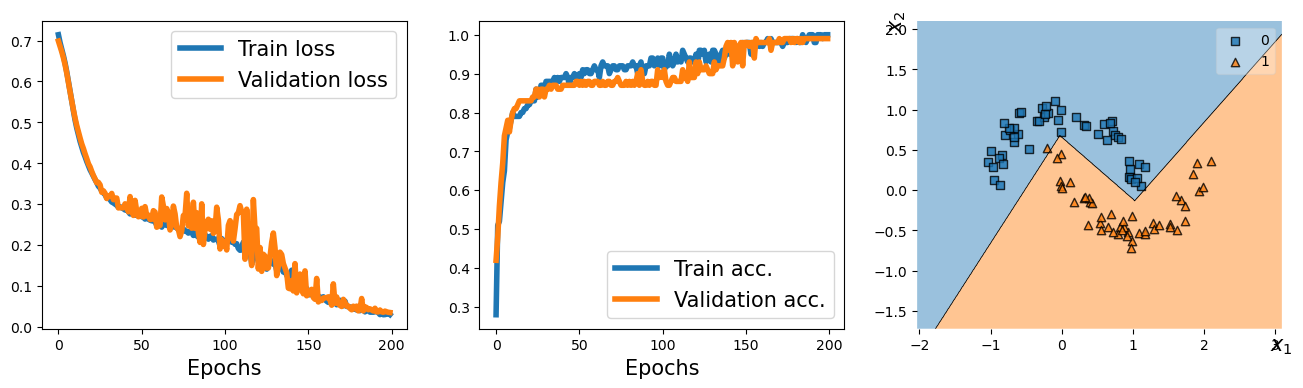

In [37]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(),
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

#plt.savefig('figures/13_03.png', dpi=300)

In [19]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
 
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)

model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): Sigmoid()
)

In [20]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

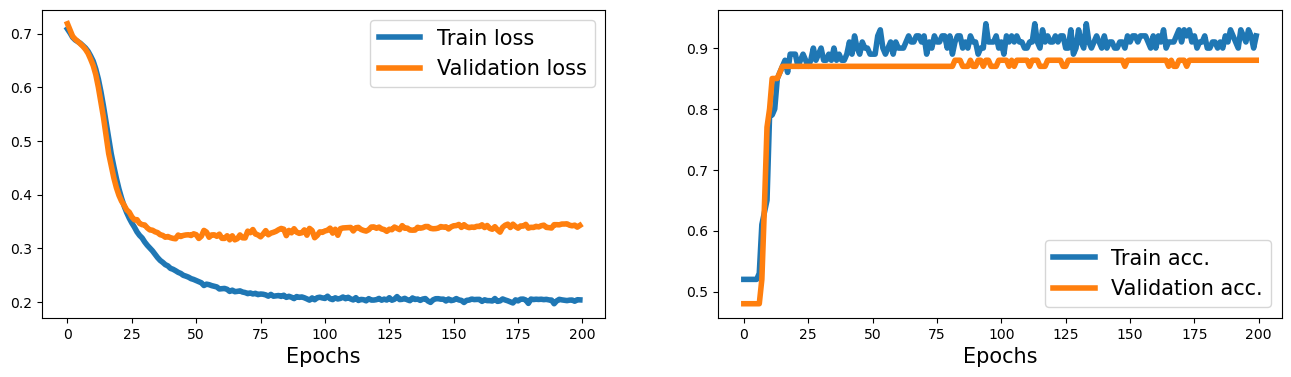

In [32]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

plt.show()

#plt.savefig('figures/13_04.png', dpi=300)

## nn.Moduleでモデル構築をより柔軟にする

In [33]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)

    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    
    def predict(self, x):
        x = torch.tensor(x, dtype=torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred>=0.5).float()
            
model = MyModule()
model


MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [34]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015)
    
# torch.manual_seed(1)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

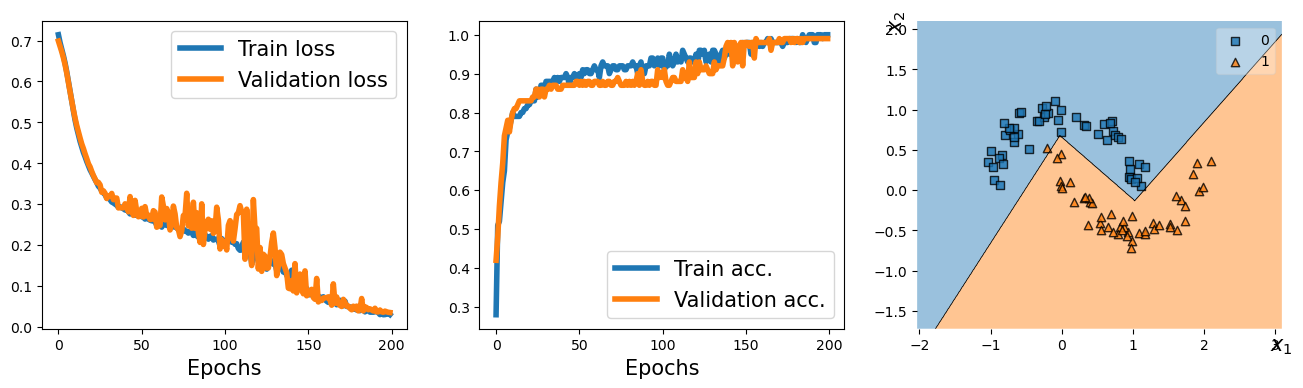

In [35]:
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train acc.', 'Validation acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid.numpy(),
                      y=y_valid.numpy().astype(np.int64),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)

#plt.savefig('figures/13_05.png', dpi=300)
plt.show()